In [23]:
import librosa as lb
import librosa.display
import pandas as pd
import numpy as np
import os
import csv
import matplotlib.pyplot as plt
from pydub import AudioSegment



# 90 bpm = 1.5 bps; 44100 samples per sec, so 66150 samples per beat.
# hop_length set to 44100 (exactly 2/3 of samples per beat) to avoid catcing half-beats
def detect_beats(filepath, hop_length=44100, start_bpm=85, units='time'):
    """Load audio file from given path, detect tempo and beats.
    
    Args:
    filepath (str): location of audio file to read
    hop_length (int, default 44100): number of samples between successive onsets
    start_bpm (int, default 85): initial guess for the tempo estimator

    Returns:
    tempo (int, in bpm), beats (np.ndarray, in milliseconds)
    """
    y, sr = lb.load(filepath)
    tempo, beats = lb.beat.beat_track(y, sr, units='time', start_bpm=start_bpm)

    if not 115 > tempo > 80:
        print('WARNING: tempo detected not between 80 and 115 BPM')
    return tempo, beats * 1000


def group_beats(beats, group_size=2):
    """Delete every nth beat"""
    return np.delete(beats, slice(None, None, group_size))


def split_audio_into_bars(filepath, bar_indexes):
    """Split a given wav file into segments based on given start locations."""
    save_name = filepath[:-4]

    audio_file = AudioSegment.from_wav(filepath)

    chunk_list = []
    # save from each index to the next as a separate file
    for i in range(len(bar_indexes) - 1):
        chunk = audio_file[bar_indexes[i]:bar_indexes[i+1]]
        chunk_name = save_name + '_bar_' + str(i)
        chunk.export(chunk_name, format='wav')
        chunk_list.append(chunk_name)

    return chunk_list


def save_spectrogram(filepath):
    y, sr = lb.load(filepath)
    D = lb.stft(y, hop_length=256, n_fft=4096)
    S_db = lb.amplitude_to_db(np.abs(D), ref=np.max)

    fig, ax = plt.subplots()
    lb.display.specshow(S_db, ax=ax)

#     fig.save(filepath)

        




In [10]:
filepath = '/home/ww/Documents/projects/bomba-detection/data/audio/El Bla Bla Bla - Charanga habanera.wav'

In [21]:
# get tempo and beat indexes from file
tempo, beats = detect_beats(filepath)
# get every 2nd beat index
bar_indexes = group_beats(beats)
# split file by bar indexes and save csv list of those chunks
chunk_list = split_audio_into_bars(filepath, bar_indexes)


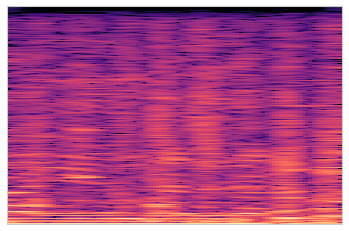

In [24]:
save_spectrogram(chunk_list[1])